In [ ]:
import requests
import json
import pandas as pd

# Visual Crossing API URL and Key
api_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/istanbul/2024-01-02/2024-12-31"
params = {
    "elements": "datetime,temp,tempmax,tempmin,precip",
    "include": "days",
    "key": "RWPPEXP28D7JVHVUDWB4S2EV4",  # Replace with your API key
    "contentType": "json"
}

# Fetch the data
response = requests.get(api_url, params=params)
if response.status_code == 200:
    weather_data = response.json()
    print("Weather data fetched successfully.")
else:
    print(f"Error: {response.status_code}, {response.text}")
    exit()

# Process the data and convert temperatures to Celsius
processed_data = []
for day in weather_data.get("days", []):
    processed_data.append({
        "date": day.get("datetime"),
        "avg_temp": (day.get("temp", 0) - 32) * 5/9,
        "max_temp": (day.get("tempmax", 0) - 32) * 5/9,
        "min_temp": (day.get("tempmin", 0) - 32) * 5/9,
        "precipitation": day.get("precip", 0)
    })

# Save the data to a CSV file
df = pd.DataFrame(processed_data)
output_file = "istanbul_weather_2024_celsius.csv"
df.to_csv(output_file, index=False)
print(f"Data saved to {output_file}")


This script fetches historical and forecasted weather data for Istanbul from January 2, 2024, to December 31, 2024, using the Visual Crossing Weather API. It retrieves daily weather data, including the average, maximum, and minimum temperatures, as well as precipitation levels. The temperatures, initially in Fahrenheit, are converted to Celsius using the formula (F - 32) * 5/9. The processed data is organized into a list of dictionaries and then transformed into a Pandas DataFrame. Finally, the data is saved to a CSV file named istanbul_weather_2024_celsius.csv for further analysis or usage. The script ensures proper error handling by checking the API response status and notifying the user if the data retrieval fails.

In [ ]:
import pandas as pd
import json

# Load the JSON file
with open("istanbul_weather_2024_2025.json", "r") as file:
    weather_data = json.load(file)

# Verify the total number of entries in the JSON file
print(f"Total entries in the JSON file: {len(weather_data)}")

# Extract the data
data = []
for i, entry in enumerate(weather_data):
    try:
        # Safely extract data for each record
        date = entry.get("requested_date", None)  # Ensure this is extracted correctly
        temp = entry.get("main", {}).get("temp", None)
        humidity = entry.get("main", {}).get("humidity", None)
        weather_main = entry.get("weather", [{}])[0].get("main") if entry.get("weather") else None

        # Append the extracted data to the list
        data.append({
            "Date": date,
            "Temperature": temp,
            "Humidity": humidity,
            "Weather": weather_main
        })

        # Debug: Print each processed entry for verification
        print(f"Processed entry {i + 1}: Date={date}, Temperature={temp}, Humidity={humidity}, Weather={weather_main}")

    except Exception as e:
        print(f"Error processing entry {i + 1}: {e}")

# Convert the list of dictionaries into a DataFrame
weather_summary = pd.DataFrame(data)

# Check for duplicates in the 'Date' field
duplicates = weather_summary[weather_summary.duplicated(subset='Date', keep=False)]
if not duplicates.empty:
    print("Warning: Duplicate entries found for the following dates:")
    print(duplicates)
else:
    print("No duplicate dates found. All dates are unique.")

# Debug: Verify the total number of unique dates
unique_dates = weather_summary['Date'].nunique()
print(f"Total unique dates processed: {unique_dates}")

# Debug: Check the DataFrame preview
print("Extracted DataFrame preview:")
print(weather_summary.head(10))

# Save the DataFrame to a CSV file
output_file = "weather_summary.csv"
weather_summary.to_csv(output_file, index=False)
print(f"Weather summary successfully saved to '{output_file}'")

# Final Verification: Ensure the row count matches the JSON entry count
if len(weather_summary) == len(weather_data):
    print("Row count in CSV matches the number of JSON entries. All records processed successfully.")
else:
    print(f"Mismatch: JSON entries={len(weather_data)}, Processed rows={len(weather_summary)}.")


This script processes weather data stored in a JSON file (istanbul_weather_2024_2025.json), extracts key fields such as date, temperature, humidity, and weather conditions, and organizes the information into a Pandas DataFrame. It includes robust error handling to ensure each entry is safely parsed and logs progress by printing processed records. Additionally, it checks for duplicate dates in the extracted data and verifies the uniqueness of all dates. After processing, it provides a preview of the resulting DataFrame and saves it as a CSV file named weather_summary.csv. Finally, it ensures that the number of processed records matches the total entries in the JSON file, confirming that all data was accurately extracted and saved.

In [ ]:
import pandas as pd
import json
import requests
from time import sleep

# Spotify API credentials
SPOTIFY_API_TOKEN = " "  # Replace with your actual Spotify API token
SPOTIFY_API_URL = "https://api.spotify.com/v1/audio-features/"

# Load multiple Spotify JSON files
files = [
    "Streaming_History_Audio_2024_8.json",
    "Streaming_History_Audio_2024-2025_9.json",
    "Streaming_History_Audio_2023-2024_7.json"
]

data = []
for file in files:
    with open(file, "r") as f:
        data.extend(json.load(f))

# Convert to DataFrame
df = pd.DataFrame(data)

# Extract date and Spotify URI
df['date'] = pd.to_datetime(df['ts']).dt.date
df['spotify_uri'] = df['spotify_track_uri']


daily_summary = df.groupby('date').agg(
    avg_playtime=('ms_played', 'mean'),
    total_playtime=('ms_played', 'sum'),
    track_count=('ms_played', 'count'),
).reset_index()

# Save the updated daily summary to a file
daily_summary.to_csv("spotify_daily_summary.csv", index=False)

print("Daily summary saved as spotify_daily_summary.csv")


This script processes Spotify streaming history from multiple JSON files, combines the data into a Pandas DataFrame, and extracts key information such as playback date and Spotify track URI. It then groups the data by date to calculate daily summary statistics, including average playtime (avg_playtime), total playtime (total_playtime), and the count of tracks played (track_count). These aggregated metrics are saved into a CSV file named spotify_daily_summary.csv, providing a concise summary of daily Spotify usage for further analysis or visualization.

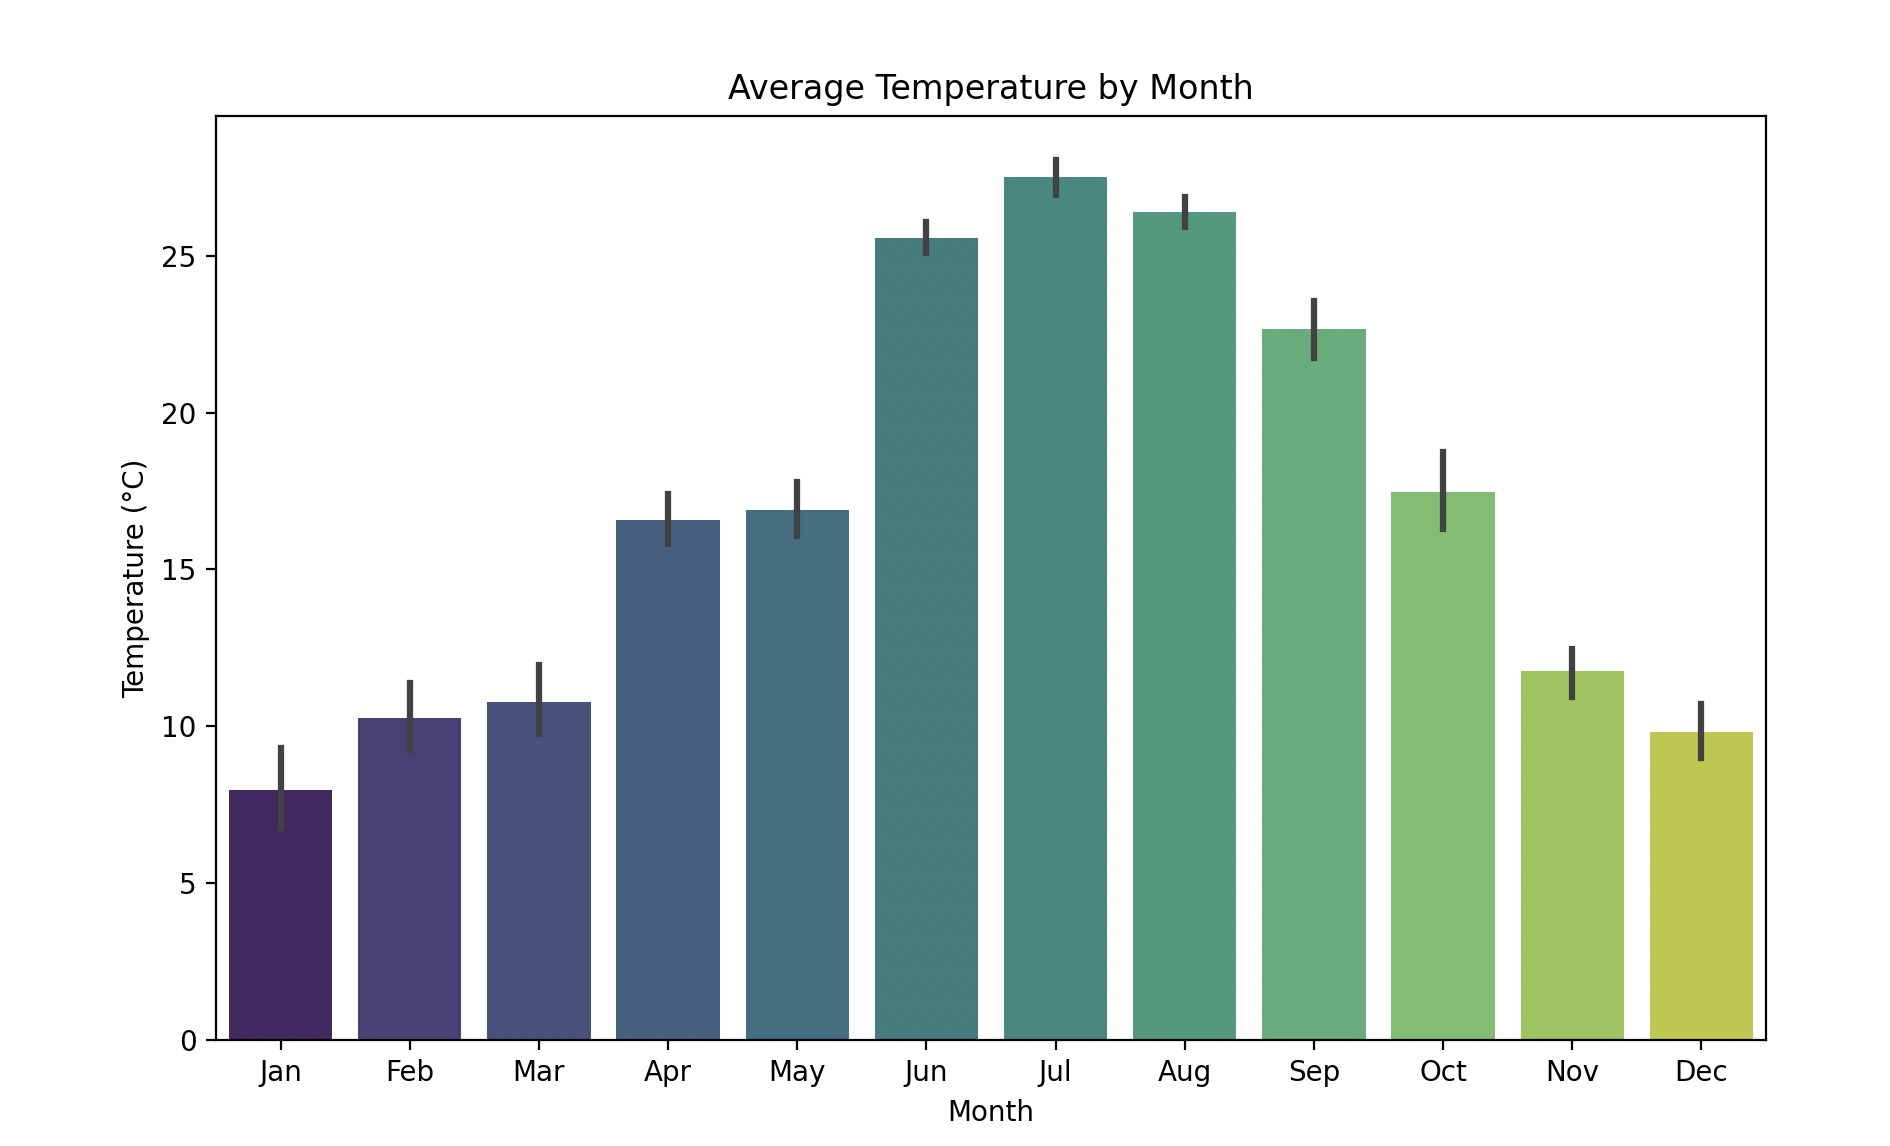

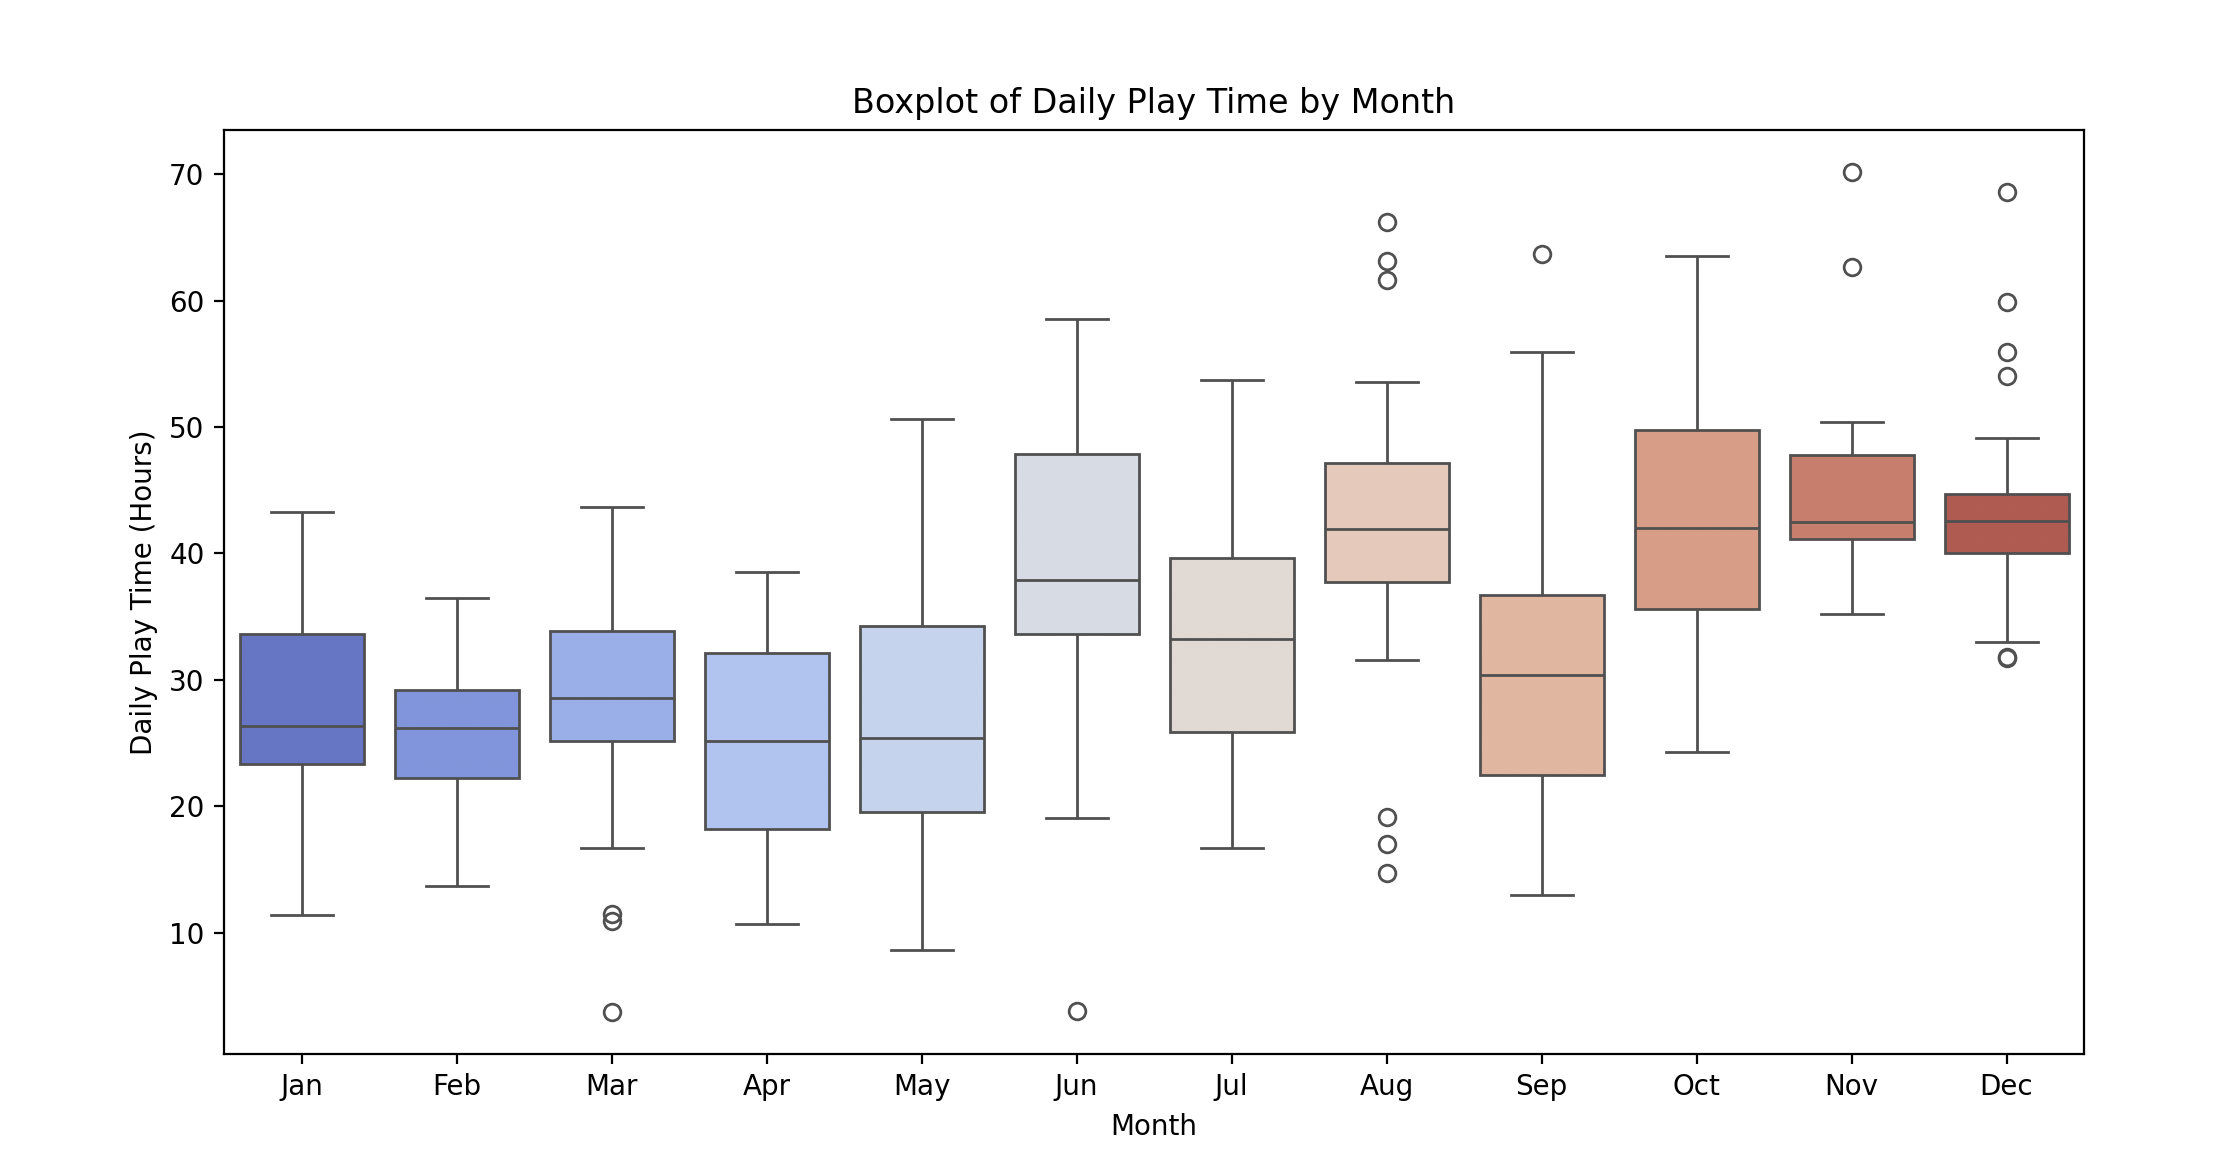

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Spotify and weather data summaries
spotify_data = pd.read_csv("spotify_daily_summary.csv")
weather_data = pd.read_csv("istanbul_weather_2024_celsius.csv")

# Merge datasets on date
merged_data = pd.merge(spotify_data, weather_data, on='date', how='inner')

# Save merged data
merged_data.to_csv("merged_spotify_weather.csv", index=False)
print("Merged data saved as merged_spotify_weather.csv")

# Convert 'date' to datetime and create the 'month' column
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data['month'] = merged_data['date'].dt.month

# Convert avg_playtime from seconds to hours
merged_data['avg_playtime_hours'] = merged_data['avg_playtime'] / 3600

# Group by month and calculate average playtime in hours for each month
monthly_avg_playtime_hours = merged_data.groupby('month')['avg_playtime_hours'].mean()

# Line Plot (original)
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_playtime_hours.index, monthly_avg_playtime_hours.values, marker='o')
plt.title('Average Play Time per Month (in Hours)')
plt.xlabel('Month')
plt.ylabel('Average Play Time (Hours)')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid()
plt.show()

# Heatmap: Monthly average playtime hours
monthly_data = merged_data.groupby(['month'])[['avg_playtime_hours', 'avg_temp']].mean().reset_index()
heatmap_data = monthly_data.pivot_table(index='month', values='avg_playtime_hours')
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap of Average Play Time (Hours) by Month")
plt.xlabel("Month")
plt.ylabel("")
plt.show()

# Boxplot: Distribution of daily playtime across months
plt.figure(figsize=(12, 6))
sns.boxplot(x=merged_data['month'], y=merged_data['avg_playtime_hours'], palette="coolwarm")
plt.title("Boxplot of Daily Play Time by Month")
plt.xlabel("Month")
plt.ylabel("Daily Play Time (Hours)")
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.show()

# Bar Plot: Average temperature vs. average playtime
plt.figure(figsize=(10, 6))
sns.barplot(x=merged_data['month'], y=merged_data['avg_temp'], palette="viridis")
plt.title("Average Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.show()

# Pairplot: Relationships between temperature and playtime
sns.pairplot(merged_data[['avg_playtime_hours', 'avg_temp', 'precipitation']], diag_kind='kde', kind="scatter", palette="husl")
plt.show()


This script analyzes and visualizes the relationship between Spotify streaming behavior and weather conditions in Istanbul by merging Spotify playback data (spotify_daily_summary.csv) with weather data (istanbul_weather_2024_celsius.csv) on the date field. After converting the average playtime from seconds to hours and grouping the data by month, the script creates several visualizations. A line plot shows monthly average playtime trends, while a heatmap highlights the monthly variation in playtime hours. A boxplot illustrates the distribution of daily playtime across months, and a bar plot compares average temperatures for each month. Lastly, a pairplot examines correlations between playtime, temperature, and precipitation, providing insights into possible patterns and relationships between weather and streaming behavior. The merged data is also saved for further analysis.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Spotify and weather data summaries
spotify_data = pd.read_csv("spotify_daily_summary.csv")
weather_data = pd.read_csv("istanbul_weather_2024_celsius.csv")

# Merge datasets on date
merged_data = pd.merge(spotify_data, weather_data, on='date', how='inner')

# Save merged data
merged_data.to_csv("merged_spotify_weather.csv", index=False)
print("Merged data saved as merged_spotify_weather.csv")

# Convert 'date' to datetime and create the 'month' column
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data['month'] = merged_data['date'].dt.month

# Convert avg_playtime from seconds to hours
merged_data['avg_playtime_hours'] = merged_data['avg_playtime'] / 3600

# 2D Density Plot: Relationship between avg_playtime_hours and avg_temp
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=merged_data['avg_temp'],
    y=merged_data['avg_playtime_hours'],
    cmap="Blues",
    fill=True,
    levels=100,
    thresh=0,
)
plt.title("2D Density Plot: Average Temperature vs. Playtime")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Average Playtime (Hours)")
plt.grid()
plt.show()

# Hexbin Plot: Relationship between avg_playtime_hours and avg_temp
plt.figure(figsize=(10, 6))
plt.hexbin(
    x=merged_data['avg_temp'],
    y=merged_data['avg_playtime_hours'],
    gridsize=30,
    cmap="coolwarm",
    mincnt=1,
)
plt.colorbar(label="Point Density")
plt.title("Hexbin Plot: Average Temperature vs. Playtime")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Average Playtime (Hours)")
plt.grid()
plt.show()

# Categorize weather based on temperature and precipitation
def categorize_weather(row):
    if row['precipitation'] > 0.1:
        return 'Rainy'
    elif row['avg_temp'] < 10:
        return 'Cold'
    elif row['avg_temp'] > 25:
        return 'Hot'
    else:
        return 'Sunny'

merged_data['weather_condition'] = merged_data.apply(categorize_weather, axis=1)

# Bar Chart: Average Playtime by Weather Condition
weather_avg_playtime = merged_data.groupby('weather_condition')['avg_playtime'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='weather_condition', y='avg_playtime', data=weather_avg_playtime, palette='viridis')
plt.title('Average Playtime by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Playtime (Seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Scatter Plot: Playtime vs. Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_temp', y='avg_playtime', data=merged_data, hue='weather_condition', palette='coolwarm')
sns.regplot(x='avg_temp', y='avg_playtime', data=merged_data, scatter=False, color='blue', ci=None)
plt.title('Relationship Between Temperature and Playtime')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average Playtime (Seconds)')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Weather Condition')
plt.show()


# Check if 'weather_condition' exists, otherwise create it
if 'weather_condition' not in merged_data.columns:
    def derive_weather_condition(row):
        if row['precipitation'] > 0.1:
            return 'Rainy'
        elif row['avg_temp'] < 10:
            return 'Cold'
        elif row['avg_temp'] > 25:
            return 'Hot'
        else:
            return 'Sunny'

    merged_data['weather_condition'] = merged_data.apply(derive_weather_condition, axis=1)

# Convert playback duration to hours
merged_data['avg_playtime_hours'] = merged_data['avg_playtime'] / 3600

# Scatter plot: Playback duration (hours) vs. temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_temp', y='avg_playtime_hours', data=merged_data, hue='weather_condition', palette='viridis')
sns.regplot(x='avg_temp', y='avg_playtime_hours', data=merged_data, scatter=False, color='blue', ci=None)
plt.title('Playback Duration vs. Temperature (Hours)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Playback Duration (Hours)')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Weather Condition')
plt.show()

# 2D Density Plot: Temperature vs. Playback Duration (Hours)
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=merged_data['avg_temp'],
    y=merged_data['avg_playtime_hours'],
    cmap='coolwarm', fill=True, levels=50, thresh=0
)
plt.title('Density Plot: Temperature vs. Playback Duration (Hours)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Playback Duration (Hours)')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


This script explores the relationship between Spotify streaming behavior and weather conditions using merged daily summaries of playback and weather data. It creates visualizations such as a 2D density plot and hexbin plot to analyze how average temperature correlates with playback duration in hours. It categorizes weather into conditions like 'Rainy,' 'Cold,' 'Hot,' and 'Sunny' based on temperature and precipitation, then generates a bar chart showing average playtime for each weather condition. Scatter plots with regression lines explore the relationship between temperature and playback, while density plots highlight the distribution of playback duration across temperature ranges. The analysis combines statistical insights with visually rich graphs to uncover trends in streaming habits under varying weather conditions.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


weather_data = pd.read_csv("merged_spotify_weather.csv")
spotify_data = pd.read_csv("spotify_data_with_tempo.csv")

# Merge the datasets on the 'date' column
merged_combined_data = pd.merge(spotify_data, weather_data, on='date', how='inner')

# Convert playback duration from milliseconds to hours
merged_combined_data['playtime_hours'] = merged_combined_data['ms_played'] / (3600 * 1000)

# Derive weather condition if not already present
def derive_weather_condition(row):
    if row['precipitation'] > 0.1:
        return 'Rainy'
    elif row['avg_temp'] < 10:
        return 'Cold'
    elif row['avg_temp'] > 25:
        return 'Hot'
    else:
        return 'Sunny'

if 'weather_condition' not in merged_combined_data.columns:
    merged_combined_data['weather_condition'] = merged_combined_data.apply(derive_weather_condition, axis=1)

# 1. Playback Trends by Weather
weather_playback = (
    merged_combined_data.groupby('weather_condition')['playtime_hours']
    .sum()
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(x='weather_condition', y='playtime_hours', data=weather_playback, palette='viridis')
plt.title('Total Playback Duration by Weather Condition (Hours)')
plt.xlabel('Weather Condition')
plt.ylabel('Playback Duration (Hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


This script analyzes the total playback duration on Spotify in hours across different weather conditions by merging Spotify playback data with weather data. It categorizes weather into conditions such as 'Rainy,' 'Cold,' 'Hot,' and 'Sunny,' based on temperature and precipitation thresholds, and converts playback duration from milliseconds to hours for meaningful comparison. A bar chart visualizes the total playback duration for each weather condition, highlighting how listening habits may vary with weather. This allows insights into how external environmental factors influence Spotify usage, presenting trends in music consumption patterns under different weather scenarios.

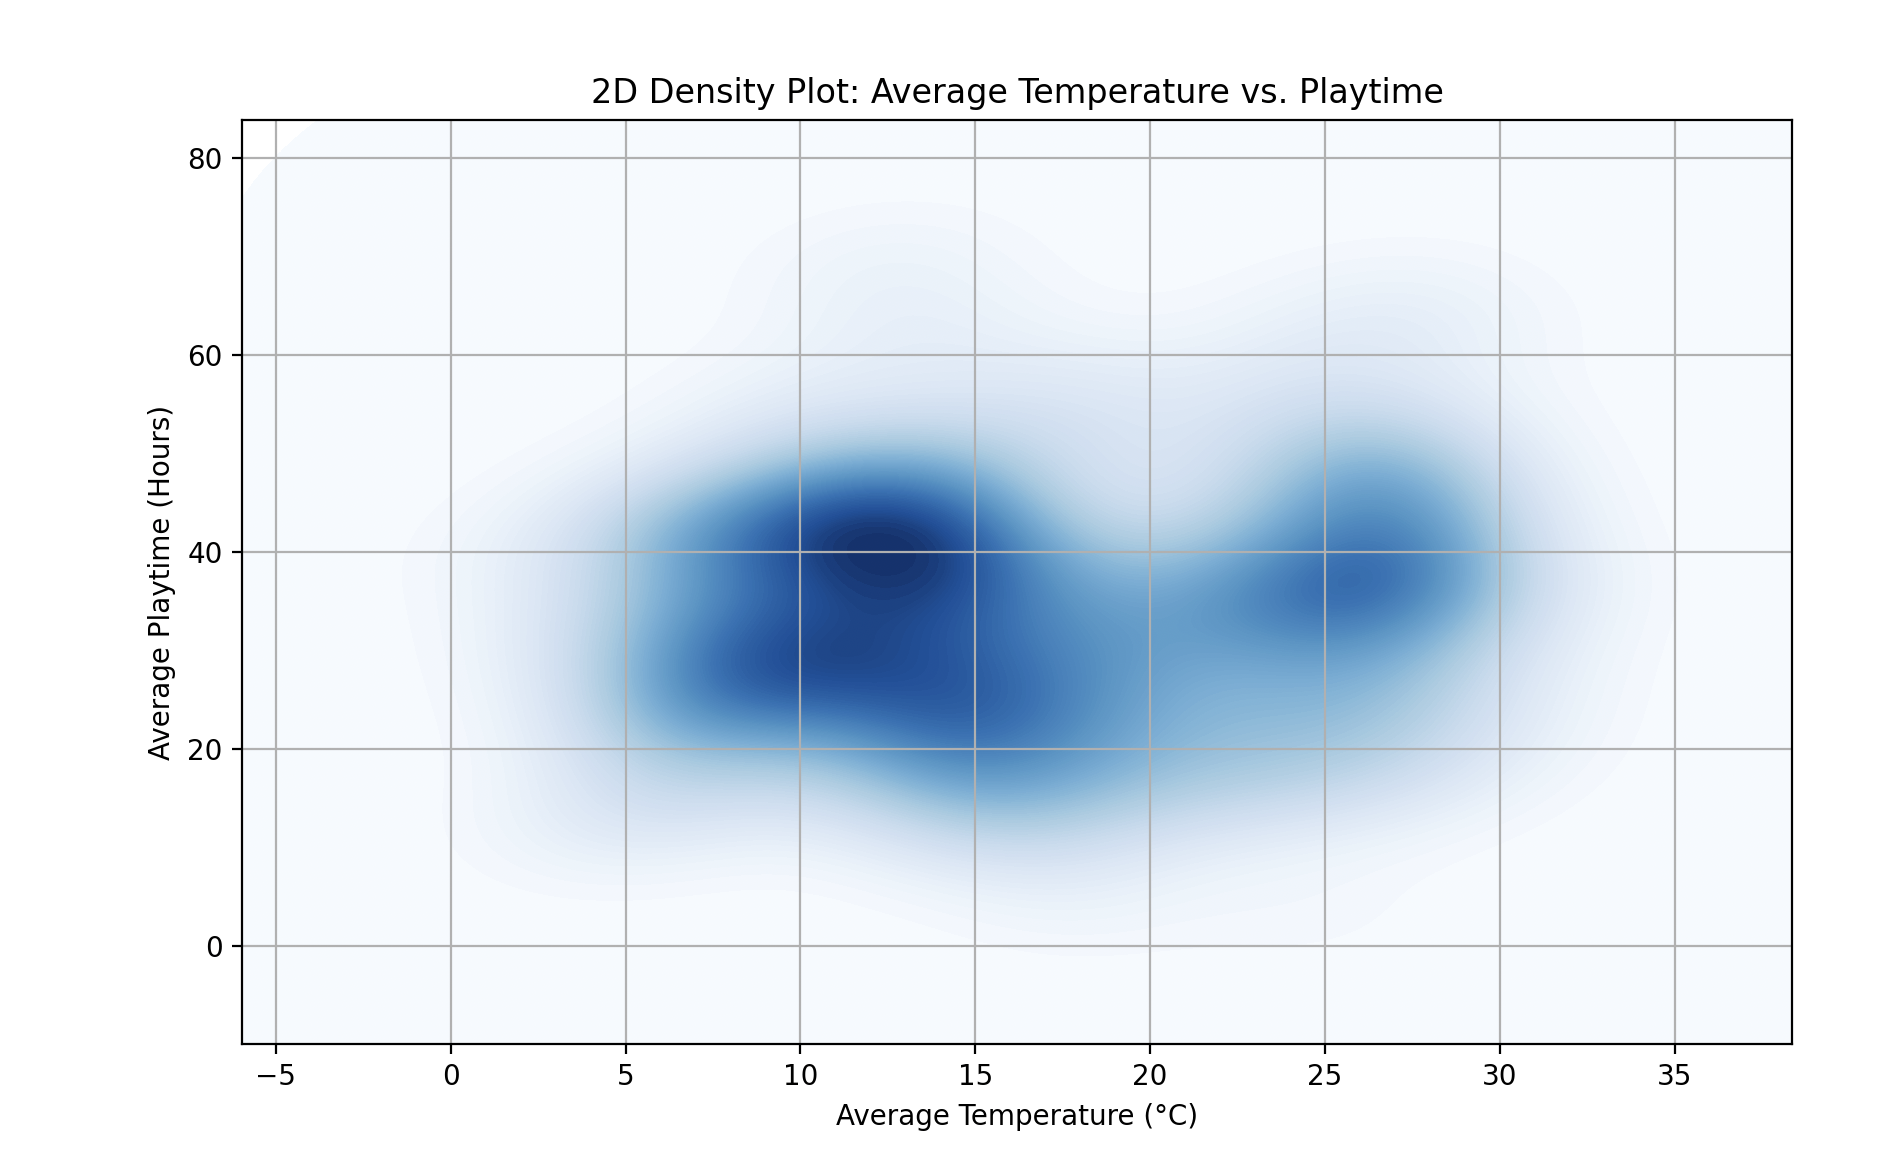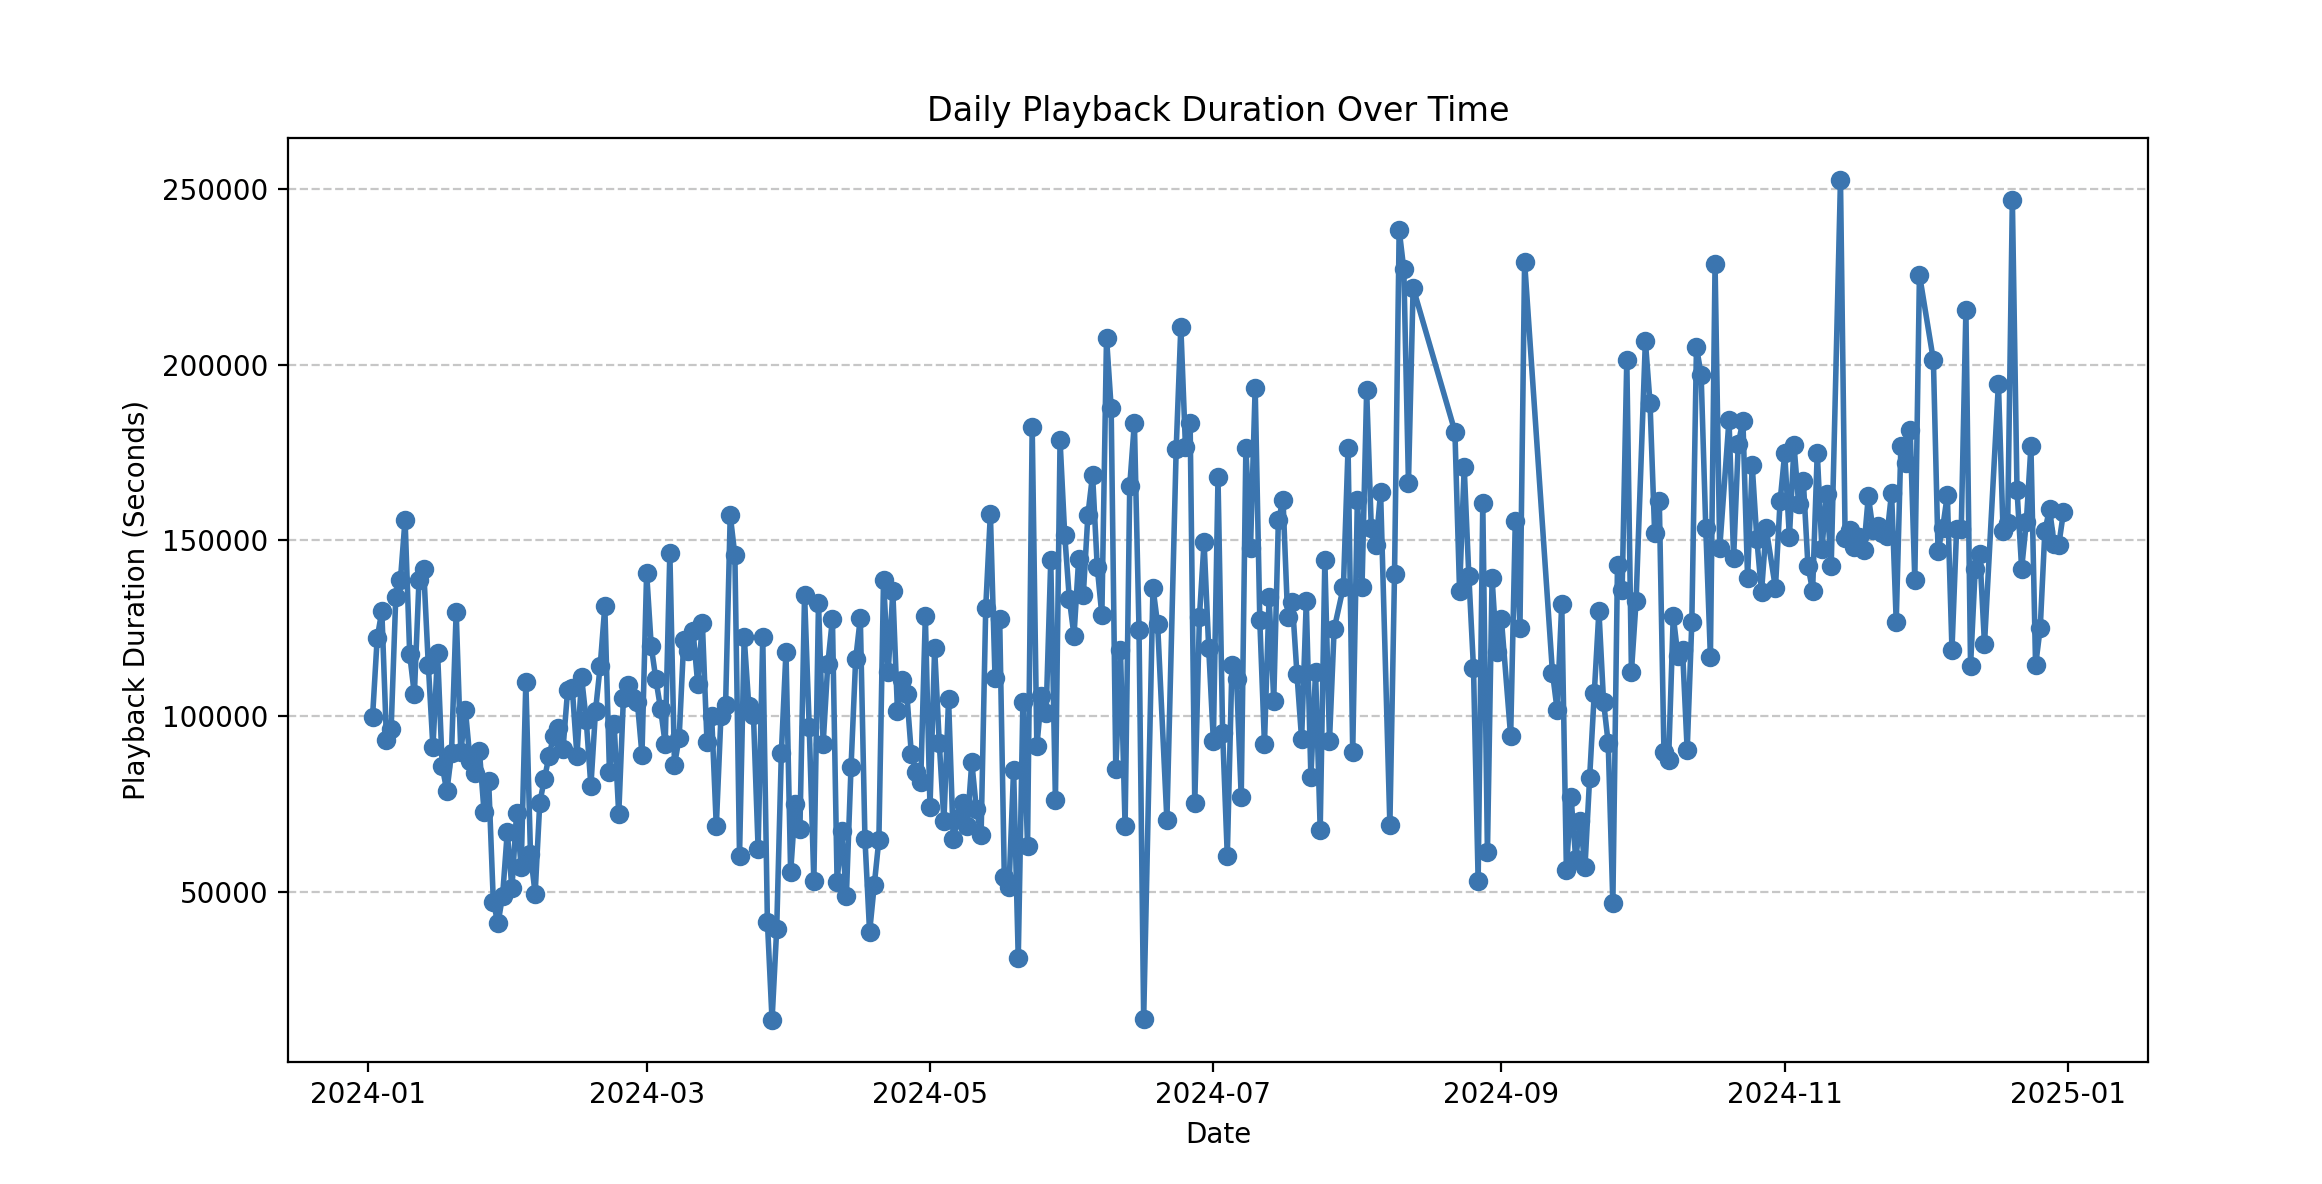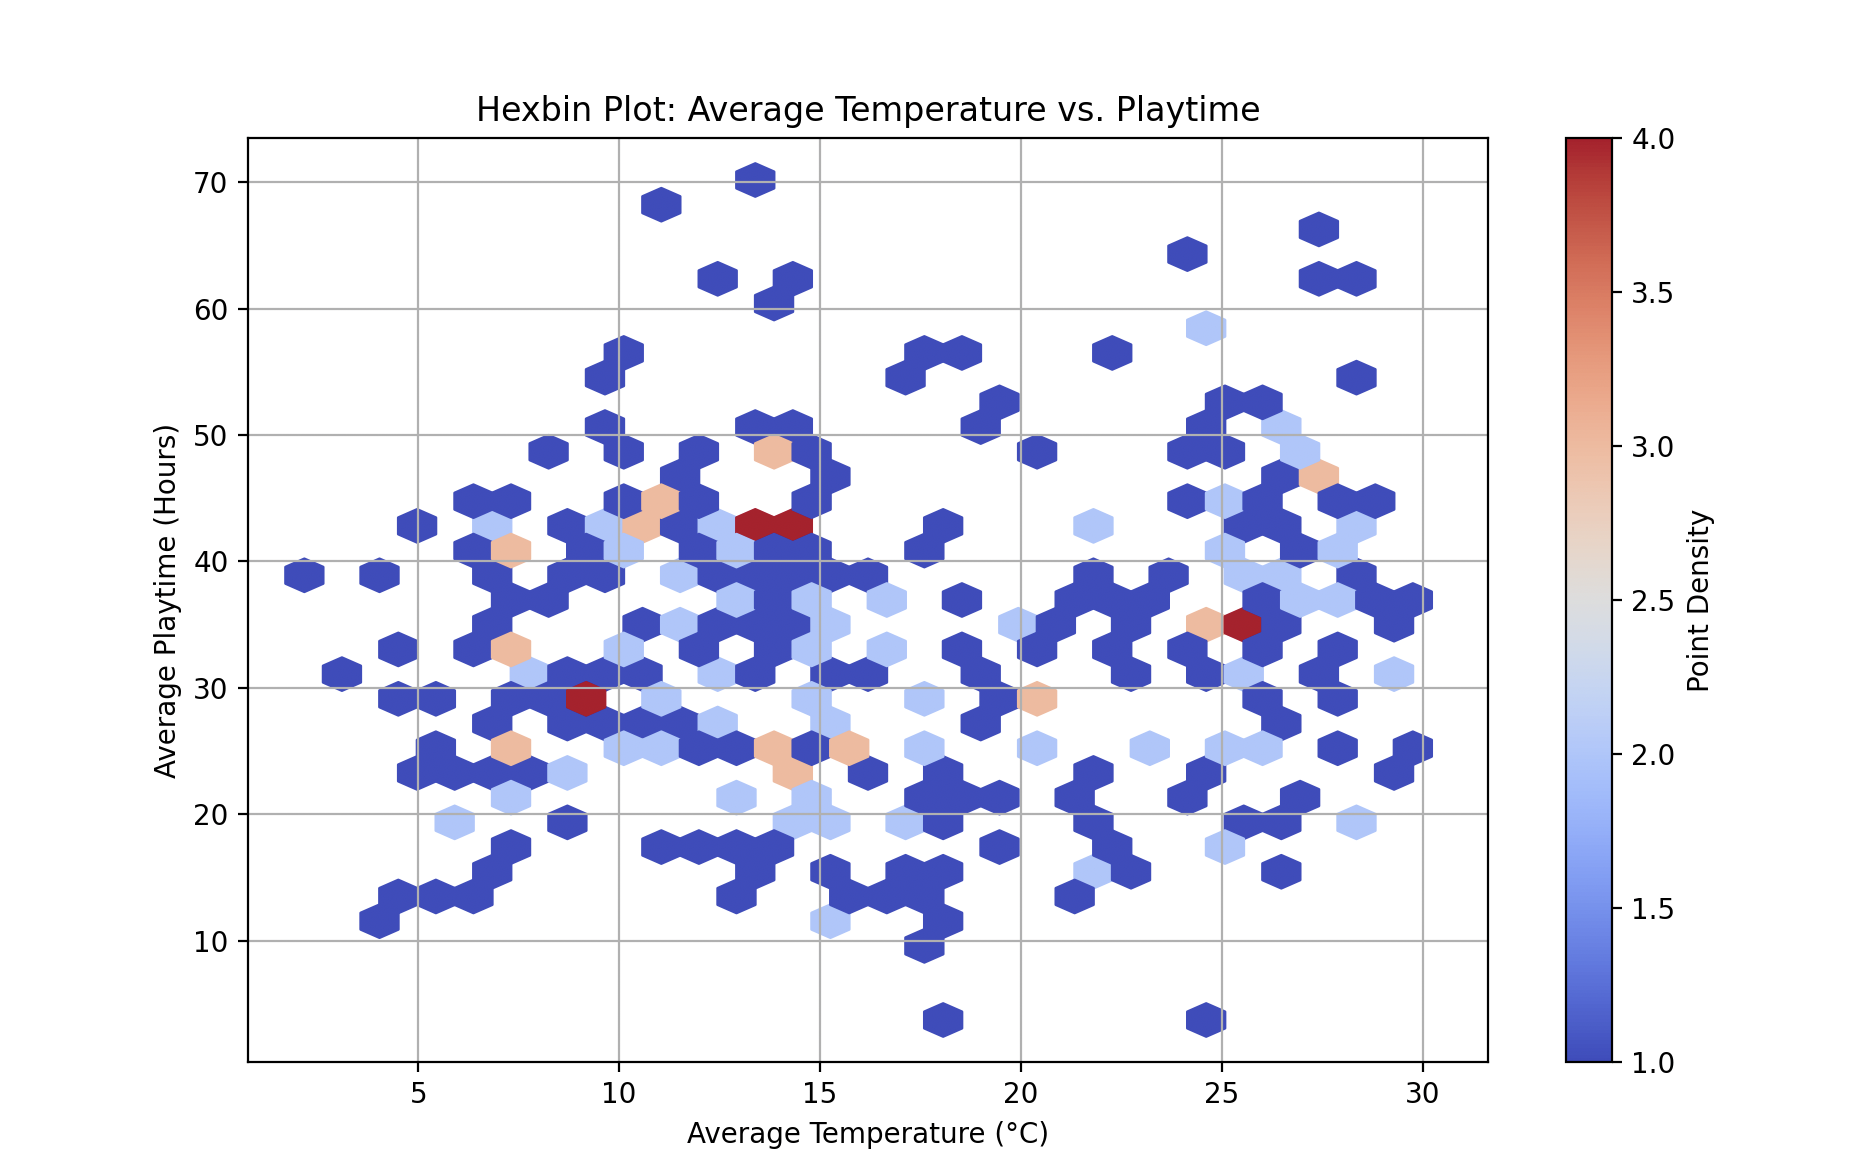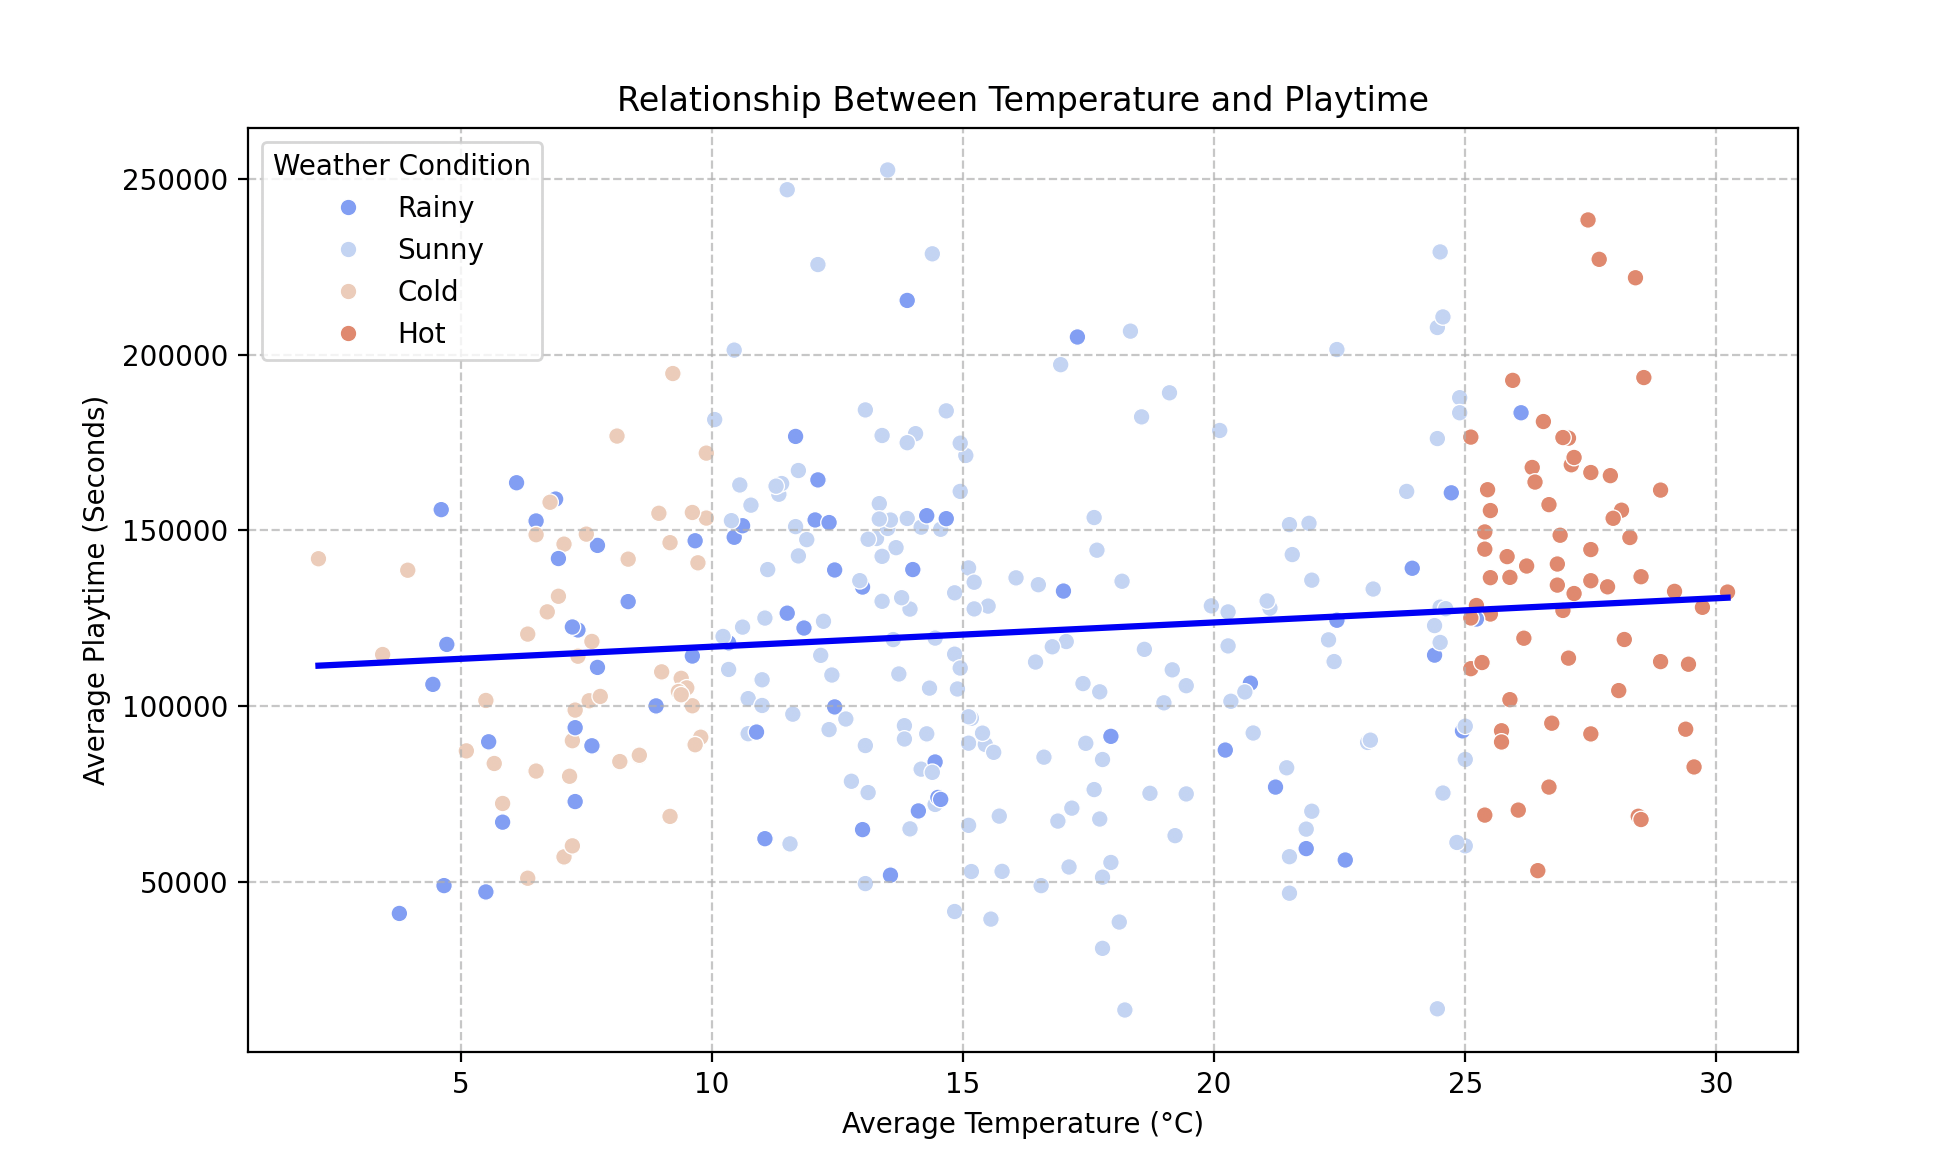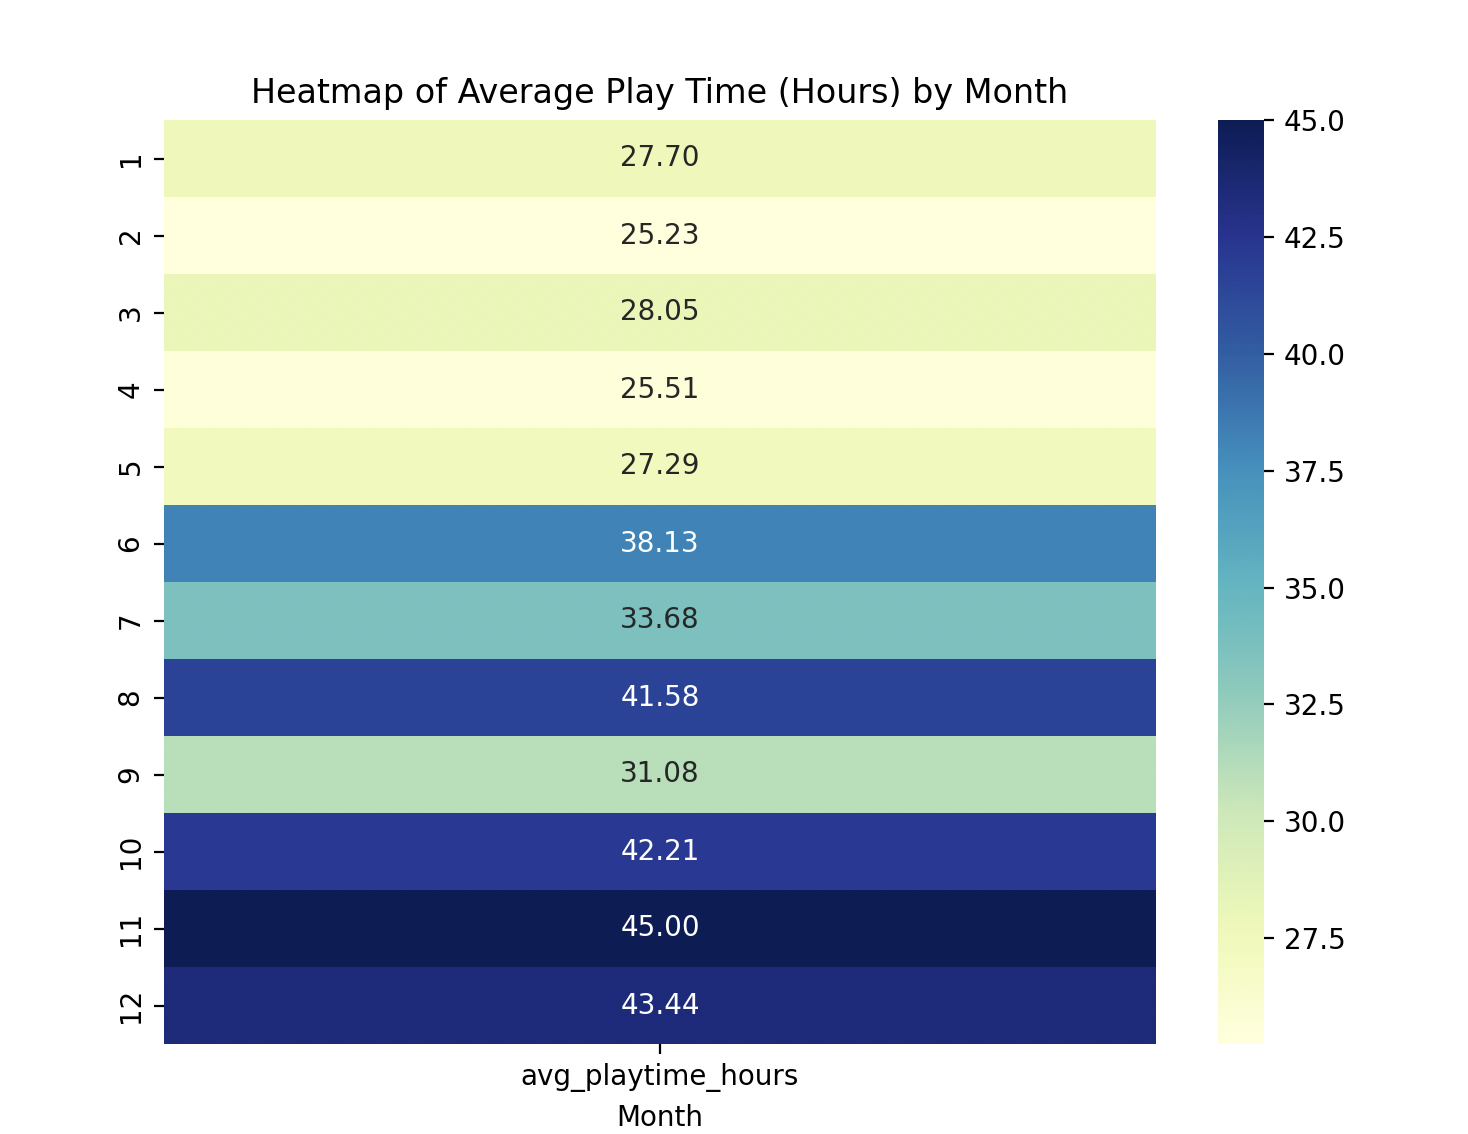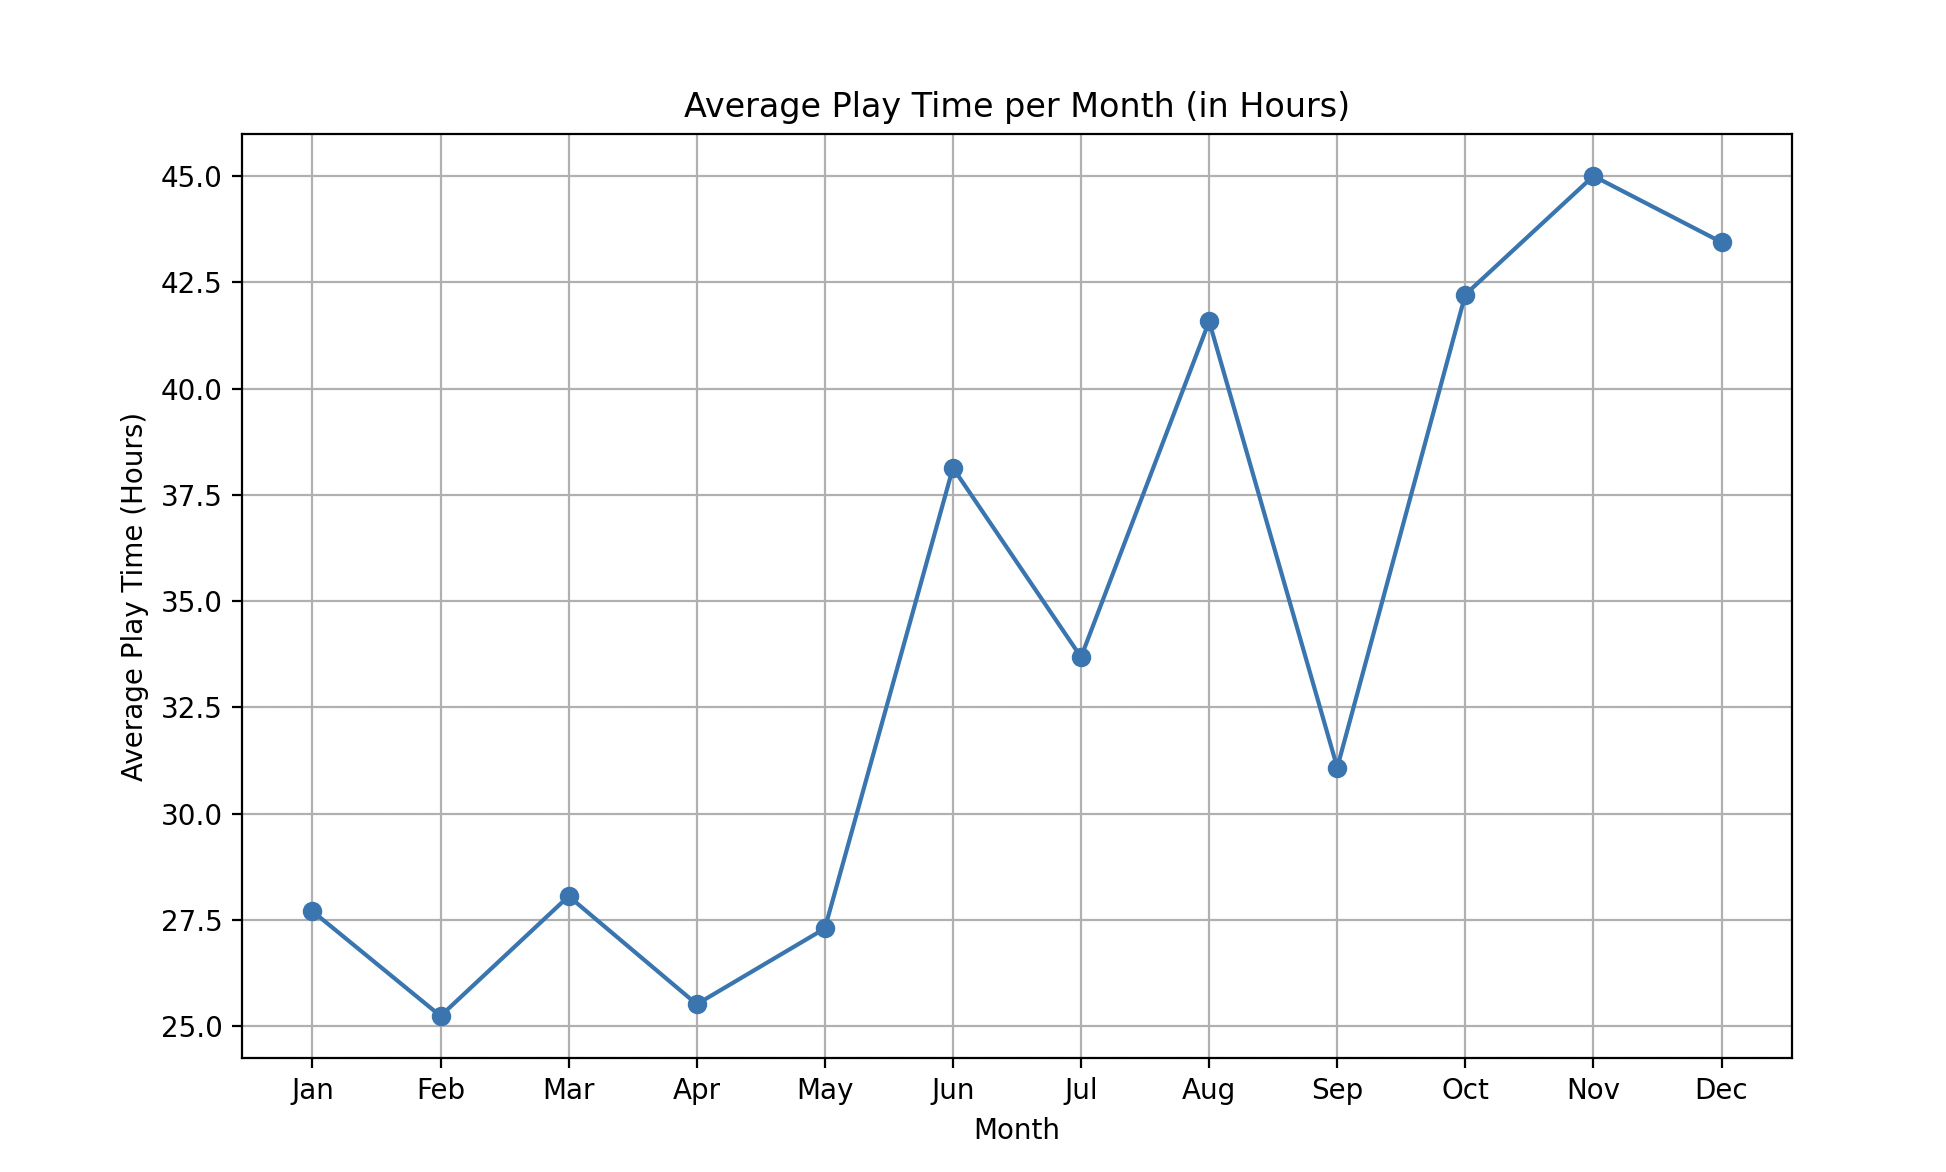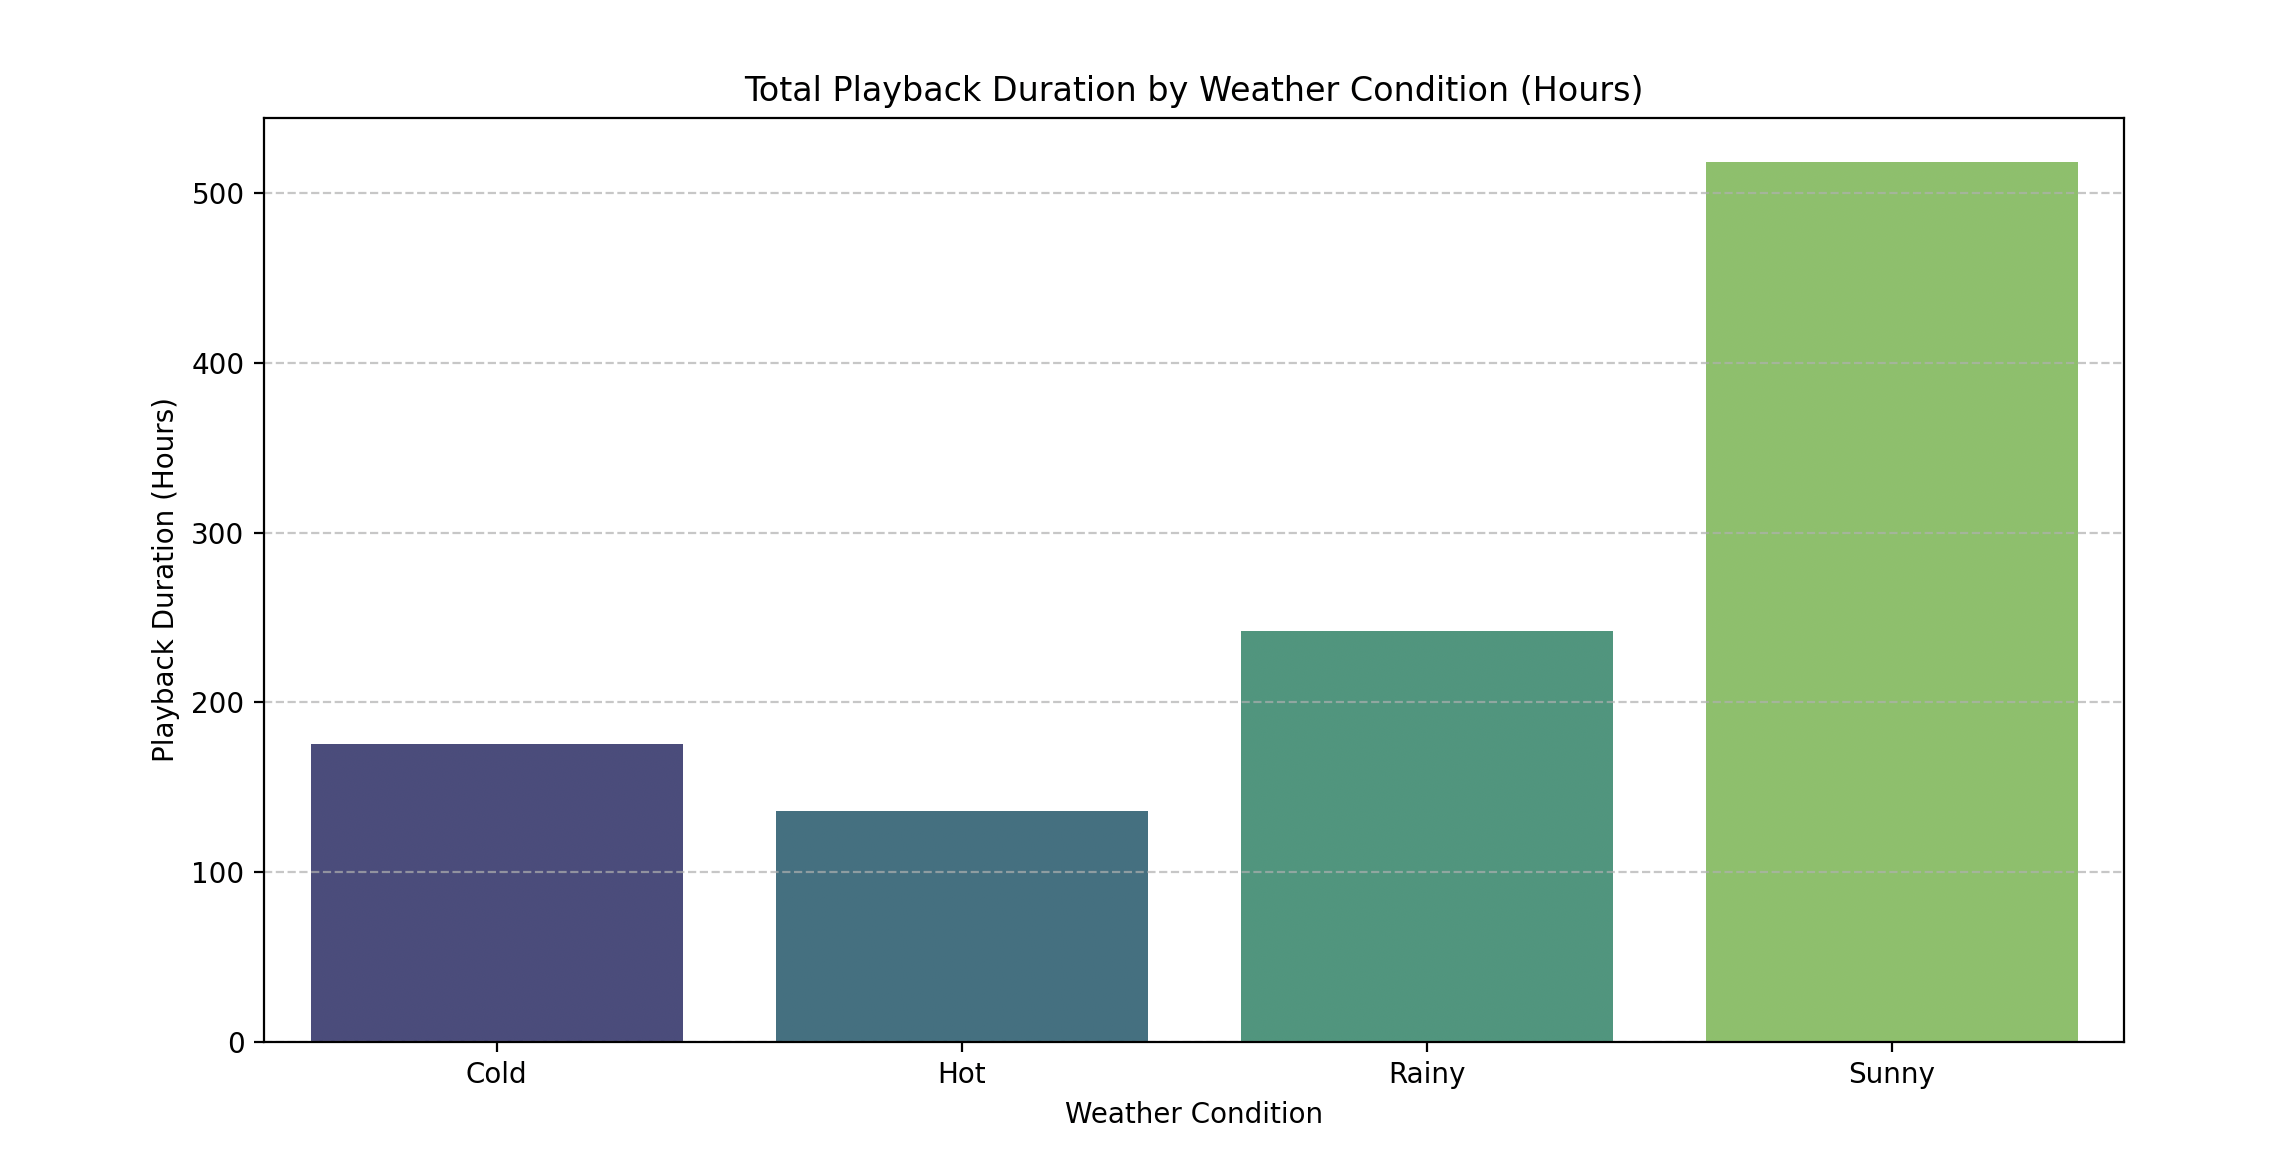

Liability:


In this project, my objective was to analyze the impact of weather conditions on my personal music listening habits by correlating Spotify listening history with historical weather data. Initially, I planned to examine the relationship between the tempo of the tracks I listened to and weather conditions, leveraging Spotify's API to retrieve audio features such as tempo, energy, and valence. However, due to Spotify's API restrictions in 2024, I was unable to fetch audio description data for the tracks in my listening history.

To adapt to this limitation, I shifted my focus to exploring the relationship between my listening time and weather conditions. By combining my Spotify playback data with weather metrics such as temperature, precipitation, and general weather conditions (e.g., sunny, rainy, cold), I analyzed trends in listening frequency and duration under varying weather scenarios. This adjustment ensured the continuity and relevance of the project's objectives while addressing the unavailability of the audio description data.